In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from utils import run_test, run_search_test, plot_search
import numpy as np

In [25]:
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=11), n_estimators=25, random_state=42)

run_test(model, verbose=True, seed=42)

{'all_features': {'train_loss': 0.6020242673416661,
  'val_loss': 0.4748368979605373},
 '5_features': {'train_loss': 0.6070106876523715,
  'val_loss': 0.5103474721322305},
 '10_features': {'train_loss': 0.6197779884232981,
  'val_loss': 0.49323585098100226},
 '15_features': {'train_loss': 0.6424956822851301,
  'val_loss': 0.4842679444563769},
 '20_features': {'train_loss': 0.6348966250172561,
  'val_loss': 0.4911321244511737}}

In [30]:
def ada_boost(max_depth):
    return AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth))

search_dict = run_search_test(ada_boost, "max_depth", [1, 3, 5, 7, 8, 9, 10, 11, 12, 13], seed=42, save_json=True, verbose=True)

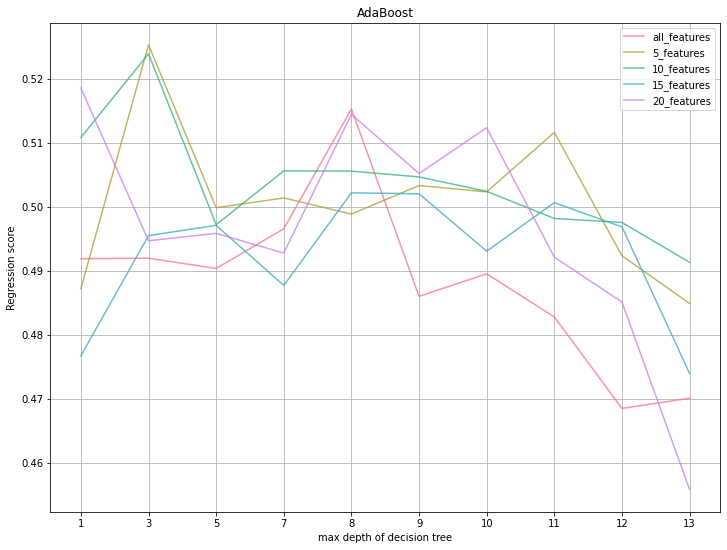

In [2]:
import json
from os.path import join
from utils import JSON_PATH, plot_search

search_dict = json.load(open(join(JSON_PATH, "AdaBoostRegressor_max_depth.json"), 'r'))

plot_search("AdaBoost", "max depth of decision tree", search_dict, save_png=True, save_tex=True)

Then we predict on the test set
---

In [18]:
from preprocess import get_dataset, dataset_to_X_y, preprocess_all, MRMR_5_FEATURES


dataset = get_dataset(train_size=.999)
dataset = preprocess_all(dataset, subset=MRMR_5_FEATURES)
X_train, y_train = dataset_to_X_y(dataset, ["train"], datatype="df")
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3))
model.fit(X_train, y_train)

/home/romaingrx/anaconda3/envs/lelec2870/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3))

In [20]:
import pandas as pd

X_test = dataset.test.X
y_test_hat = model.predict(X_test).astype(np.int_)
s_test = pd.Series(y_test_hat)
s_test.to_csv("Y2.csv", header=False, index=False)